产生一个二元回归模型
$$
Y=b_0+b_1X_1+b_2X_2+\epsilon
$$
其中$b_0=0.5,b_1=1,b_2=2, X_1\sim U(0,1), X_2\sim U(0,1), \epsilon \sim N(0,1)$

In [1]:
import numpy as np

b0=0.5
b1=1
b2=2
x1=np.random.uniform(0,1,1000)
x2=np.random.uniform(0,1,1000)
epsilon=np.random.randn(1000)
y=b0+b1*x1+b2*x2+epsilon

尝试用Adagrad的方法来求解，初始值直接用从标准正态分布中采样,$\eta$的值设为1

In [2]:
eta=1
e_b0=[]
e_b1=[]
e_b2=[]
e_b0_grad=[]
e_b1_grad=[]
e_b2_grad=[]
e_b0.append(np.random.randn(1))
e_b1.append(np.random.randn(1))
e_b2.append(np.random.randn(1))
for i in range(10000):
    e_b0_grad.append(np.sum(2*(y-e_b0[i]-e_b1[i]*x1-e_b2[i]*x2))/(-1000))
    e_b1_grad.append(np.sum(2*(y-e_b0[i]-e_b1[i]*x1-e_b2[i]*x2)*x1)/(-1000))
    e_b2_grad.append(np.sum(2*(y-e_b0[i]-e_b1[i]*x1-e_b2[i]*x2)*x2)/(-1000))
    e_b0.append(e_b0[i]-eta/np.sum(np.power(e_b0_grad,2))*e_b0_grad[i])
    e_b1.append(e_b1[i]-eta/np.sum(np.power(e_b1_grad,2))*e_b1_grad[i])
    e_b2.append(e_b2[i]-eta/np.sum(np.power(e_b2_grad,2))*e_b2_grad[i])
    if np.abs(e_b0[i]-e_b0[i-1])+np.abs(e_b1[i]-e_b1[i-1])+np.abs(e_b2[i]-e_b2[i-1])<10**-4:
        break

Text(0.5, 1.0, '损失函数图')

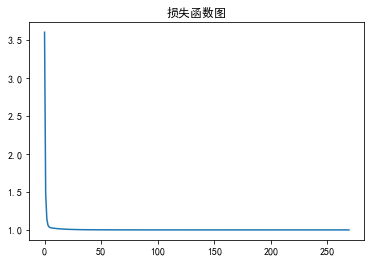

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
loss=np.zeros(len(e_b2))
for i in range(len(e_b2)):
    loss[i]=np.sum((y-e_b0[i].item()-e_b1[i].item()*x1-e_b2[i].item()*x2)**2)/1000
plt.plot(loss)
plt.title('损失函数图')

In [5]:
print(e_b0[-1])
print(e_b1[-1])
print(e_b2[-1])
print(len(e_b0))

[0.64365614]
[0.82961552]
[1.95380538]
270


下面考虑用随机梯度下降做一遍

In [9]:
import numpy as np

b0=0.5
b1=1
b2=2
x1=np.random.uniform(0,1,1000)
x2=np.random.uniform(0,1,1000)
epsilon=np.random.randn(1000)
y=b0+b1*x1+b2*x2+epsilon

eta=1
e_b0=[]
e_b1=[]
e_b2=[]
# e_b0_grad=[]
# e_b1_grad=[]
# e_b2_grad=[]
e_b0.append(np.random.randn(1))
e_b1.append(np.random.randn(1))
e_b2.append(np.random.randn(1))

for epoch in range(1000):
    for j in range(1000):
        e_b0_grad=-(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j])
        e_b1_grad=-(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j])*x1[j]
        e_b2_grad=-(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j])*x2[j]
#         e_b0_grad.append(-2*(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j]))
#         e_b1_grad.append(-2*(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j])*x1[j])
#         e_b2_grad.append(-2*(y[j]-e_b0[-1]-e_b1[-1]*x1[j]-e_b2[-1]*x2[j])*x2[j])        
        e_b0.append(e_b0[-1]-eta/np.sqrt(epoch+1)*e_b0_grad)
        e_b1.append(e_b1[-1]-eta/np.sqrt(epoch+1)*e_b1_grad)
        e_b2.append(e_b2[-1]-eta/np.sqrt(epoch+1)*e_b2_grad)
        if np.abs(e_b0[-1]-e_b0[-2])+np.abs(e_b1[-1]-e_b1[-2])+np.abs(e_b2[-1]-e_b2[-2])<10**-3:
            break

Text(0.5, 1.0, '损失函数图')

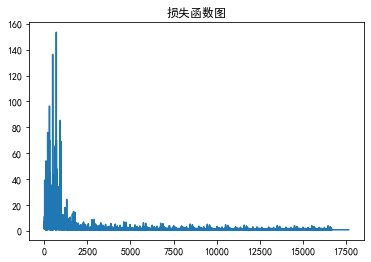

In [10]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
loss=np.zeros(len(e_b2))
for i in range(len(e_b2)):
    loss[i]=np.sum((y-e_b0[i].item()-e_b1[i].item()*x1-e_b2[i].item()*x2)**2)/1000
plt.plot(loss)
plt.title('损失函数图')

In [11]:
print(e_b0[-1])
print(e_b1[-1])
print(e_b2[-1])
print(len(e_b0))

[0.7555121]
[1.05218214]
[1.93948304]
17660
